# Imports

In [18]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import numpy as np

# Read in data

In [2]:
df = pd.read_csv('./Fraud.csv')

## General Diagnostics

In [7]:
print(df.head(5))
print(df.dtypes)

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
step                int64
type               object
amount            float64
nameOrig           object
o

In [27]:
print(df['isFraud'].value_counts()) # target variable
print(df['isFlaggedFraud'].value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


# Preprocessing

In [28]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Remap 'type' col to numeric

In [8]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
type_to_num = {'PAYMENT' : 0, 
               'TRANSFER' : 1, 
               'CASH_OUT' : 2, 
               'DEBIT' : 3, 
               'CASH_IN' : 4}

df['type'] = df['type'].map(type_to_num)

In [10]:
# sanity check

print(df['type'].unique())
print(df.head(5))
print(df.dtypes)

array([0, 1, 2, 3, 4], dtype=int64)

# EDA

## Correlation Plot

In [14]:
# extract only numeric cols
df_numeric = df.select_dtypes(include=['number'])

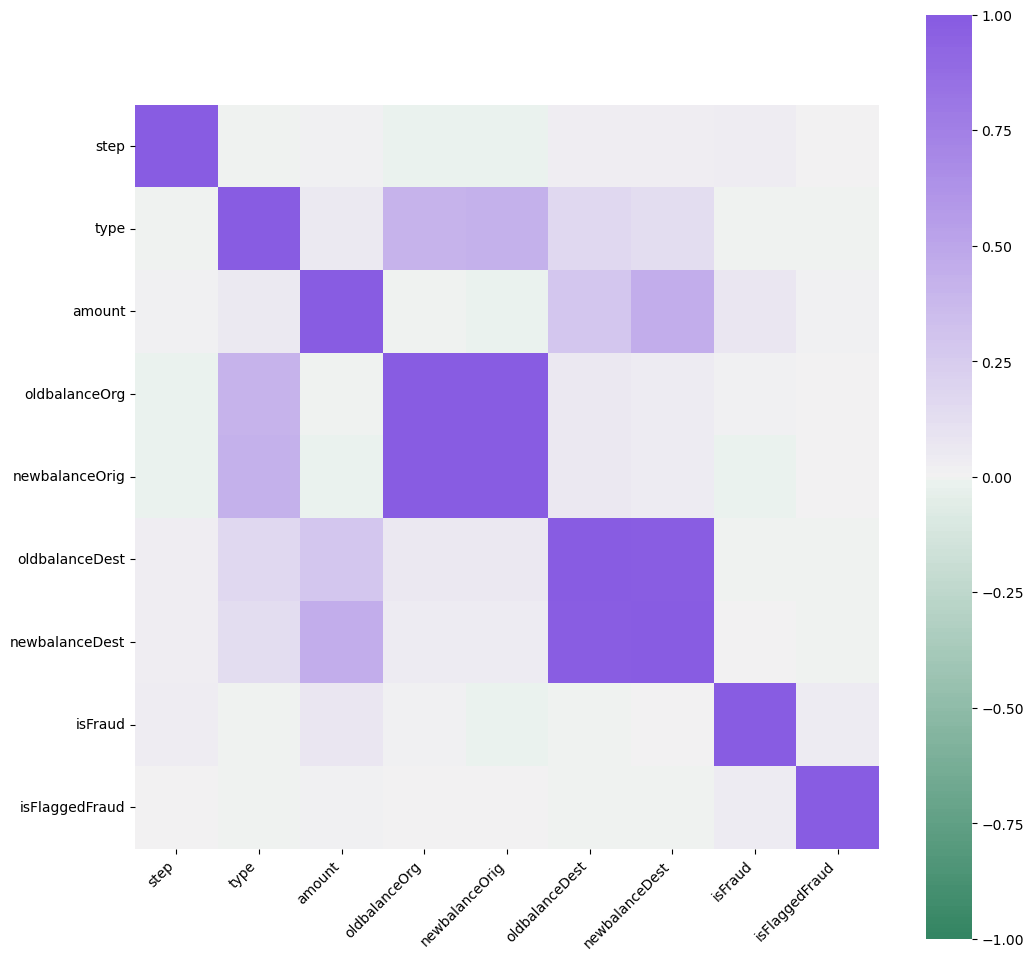

In [17]:
rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr = df_numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 275, s=80, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Distribution Plots

<Figure size 1800x1800 with 0 Axes>

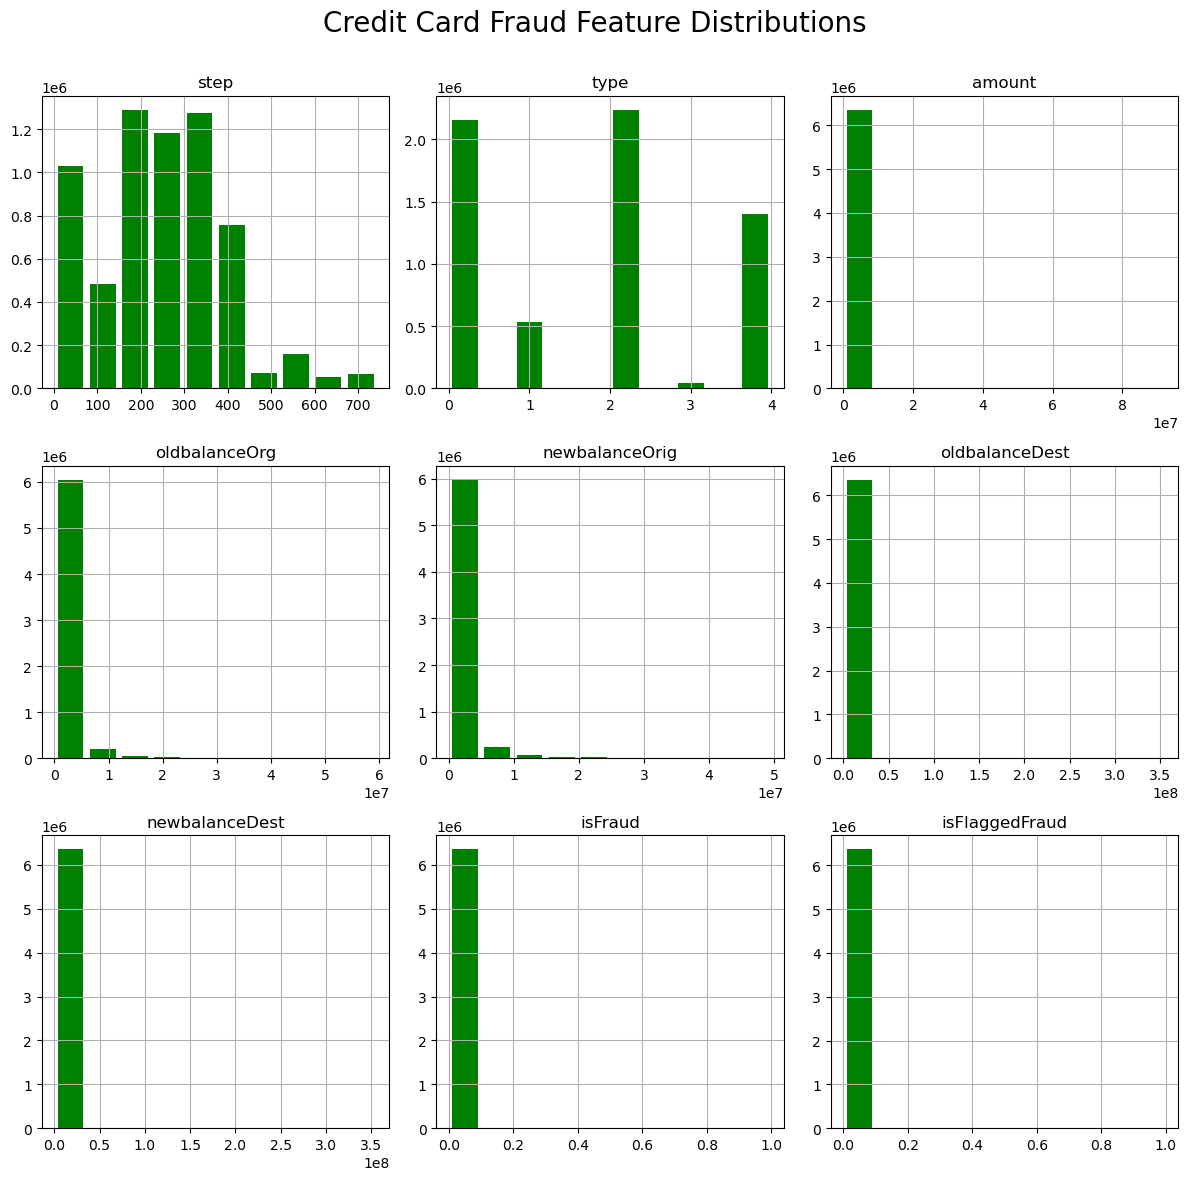

In [23]:
plt.figure(figsize=(12, 12),dpi=150)
df.hist(color='green', rwidth=0.8)
plt.suptitle("Credit Card Fraud Feature Distributions\n", size=20)
plt.tight_layout()